In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler


Bad key "text.kerning_factor" on line 4 in
C:\Users\DK\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Load the Iris dataset
iris_data = load_iris()
X, y = iris_data.data, iris_data.target

# One hot encode the target
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

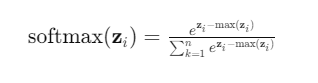

In [3]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / exp_z.sum(axis=1, keepdims=True)


In [4]:
def compute_loss(X, y, weights, bias):
    z = np.dot(X, weights) + bias
    predictions = softmax(z)
    loss = -np.mean(np.sum(y * np.log(predictions), axis=1))
    return loss

In [5]:
def gradient_descent(X, y, weights, bias, learning_rate, epochs):
    loss_history = []
    for epoch in range(epochs):
        # Compute the predictions
        z = np.dot(X, weights) + bias
        predictions = softmax(z)

        # Compute the error
        error = predictions - y

        # Compute the gradients
        gradient_weights = np.dot(X.T, error) / X.shape[0]
        gradient_bias = np.mean(error, axis=0)

        # Update the weights and bias
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

        # Store the loss for plotting
        loss = compute_loss(X, y, weights, bias)
        loss_history.append(loss)
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')

    return weights, bias, loss_history

In [6]:
# 

In [24]:
weights = np.zeros((X_train.shape[1], y_train.shape[1]))
bias = np.zeros(y_train.shape[1])
learning_rate = 0.01
epochs = 500

# Run gradient descent
gd_weights, gd_bias, gd_loss_history = gradient_descent(X_train, y_train, weights.copy(), bias.copy(), learning_rate, epochs)

Epoch 0, Loss: 1.0891654957955377
Epoch 10, Loss: 1.003825924675905
Epoch 20, Loss: 0.9330528844902791
Epoch 30, Loss: 0.8741852048558416
Epoch 40, Loss: 0.8249421448732173
Epoch 50, Loss: 0.78344142122091
Epoch 60, Loss: 0.7481670181688276
Epoch 70, Loss: 0.7179152840860081
Epoch 80, Loss: 0.691737196257394
Epoch 90, Loss: 0.6688857819156409
Epoch 100, Loss: 0.6487719933185974
Epoch 110, Loss: 0.6309293267948944
Epoch 120, Loss: 0.6149861764152208
Epoch 130, Loss: 0.6006445315795417
Epoch 140, Loss: 0.5876636695897858
Epoch 150, Loss: 0.5758476931912203
Epoch 160, Loss: 0.5650359926853364
Epoch 170, Loss: 0.5550959206894196
Epoch 180, Loss: 0.5459171390682525
Epoch 190, Loss: 0.5374072316692717
Epoch 200, Loss: 0.5294882785586693
Epoch 210, Loss: 0.522094163987585
Epoch 220, Loss: 0.5151684472741487
Epoch 230, Loss: 0.508662668055399
Epoch 240, Loss: 0.5025349887369371
Epoch 250, Loss: 0.4967491003066847
Epoch 260, Loss: 0.491273335101564
Epoch 270, Loss: 0.4860799431793628
Epoch 280,

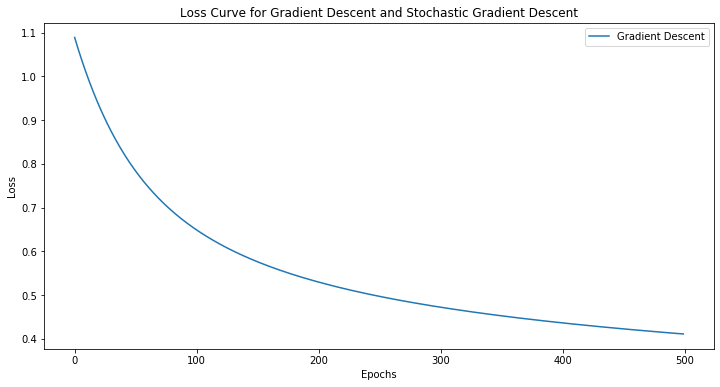

In [25]:
# Plot the loss curves
plt.figure(figsize=(12, 6))
plt.plot(gd_loss_history, label='Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for Gradient Descent and Stochastic Gradient Descent')
plt.legend()
plt.show()


In [26]:
def sgd(X, y, weights, bias, learning_rate, epochs):
    loss_history = []
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(X.shape[0]):
            # Compute the prediction
            z = np.dot(X[i], weights) + bias
            prediction = softmax(z.reshape(1, -1)).flatten()

            # Compute the error
            error = prediction - y[i]

        # Compute the gradients
            gradient_weights = np.outer(X[i], error)
            gradient_bias = np.mean(error, axis=0)
            # Update the weights and bias
            weights -= learning_rate * gradient_weights
            bias -= learning_rate * gradient_bias

            # Compute the loss for this example
            example_loss = compute_loss(X, y, weights, bias)
            epoch_loss += example_loss

        # Store the average loss for the epoch
        loss_history.append(epoch_loss / X.shape[0])
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {epoch_loss / X.shape[0]}')

    return weights, bias, loss_history


In [27]:
# Run stochastic gradient descent
sgd_weights, sgd_bias, sgd_loss_history = sgd(X_train, y_train, weights.copy(), bias.copy(), learning_rate, epochs)

Epoch 0, Loss: 0.770353352870827
Epoch 10, Loss: 0.38542670090721215
Epoch 20, Loss: 0.35903034819184537
Epoch 30, Loss: 0.3477068215168495
Epoch 40, Loss: 0.3414876474780172
Epoch 50, Loss: 0.3375542947843265
Epoch 60, Loss: 0.33480758582407827
Epoch 70, Loss: 0.3327476165613057
Epoch 80, Loss: 0.33112125568247985
Epoch 90, Loss: 0.32978884878347814
Epoch 100, Loss: 0.3286675209734438
Epoch 110, Loss: 0.32770486816285077
Epoch 120, Loss: 0.32686587068860096
Epoch 130, Loss: 0.32612598935978065
Epoch 140, Loss: 0.3254673278782155
Epoch 150, Loss: 0.3248763950926539
Epoch 160, Loss: 0.3243427406252536
Epoch 170, Loss: 0.3238580877050556
Epoch 180, Loss: 0.3234157605052562
Epoch 190, Loss: 0.3230102926251733
Epoch 200, Loss: 0.3226371510392617
Epoch 210, Loss: 0.3222925361397813
Epoch 220, Loss: 0.3219732334791733
Epoch 230, Loss: 0.3216765016164478
Epoch 240, Loss: 0.32139998579820445
Epoch 250, Loss: 0.32114165052547144
Epoch 260, Loss: 0.3208997261867941
Epoch 270, Loss: 0.32067266634

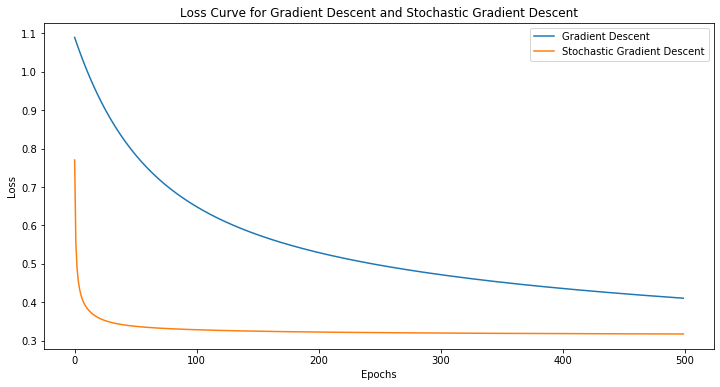

In [28]:
# Plot the loss curves
plt.figure(figsize=(12, 6))
plt.plot(gd_loss_history, label='Gradient Descent')
plt.plot(sgd_loss_history, label='Stochastic Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for Gradient Descent and Stochastic Gradient Descent')
plt.legend()
plt.show()

In [29]:
def sgd_with_momentum(X, y, weights, bias, learning_rate, epochs, momentum=0.9):
    v_weights = np.zeros_like(weights)
    v_bias = np.zeros_like(bias)
    loss_history = []
    
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(X.shape[0]):
            # Compute the prediction
            z = np.dot(X[i], weights) + bias
            prediction = softmax(z.reshape(1, -1)).flatten()

            # Compute the error
            error = prediction - y[i]

            # Compute the gradient
            gradient_weights = np.outer(X[i], error)
            gradient_bias = error

            # Update the velocities
            v_weights = momentum * v_weights + learning_rate * gradient_weights
            v_bias = momentum * v_bias + learning_rate * gradient_bias

            # Update the weights and bias
            weights -= v_weights
            bias -= v_bias

            # Compute the loss for this example
            example_loss = compute_loss(X, y, weights, bias)
            epoch_loss += example_loss

        # Store the average loss for the epoch
        loss_history.append(epoch_loss / X.shape[0])
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {epoch_loss / X.shape[0]}')

    return weights, bias, loss_history

In [30]:
momentum = 0.9
sgd_momentum_weights, sgd_momentum_bias, sgd_momentum_loss_history = sgd_with_momentum(X_train, y_train, weights.copy(), bias.copy(), learning_rate, epochs, momentum)

Epoch 0, Loss: 0.455479969661085
Epoch 10, Loss: 0.11433160292152858
Epoch 20, Loss: 0.08712815337600918
Epoch 30, Loss: 0.07607955378661095
Epoch 40, Loss: 0.06991771683771347
Epoch 50, Loss: 0.06592883580055878
Epoch 60, Loss: 0.06311166920976957
Epoch 70, Loss: 0.06100502198200708
Epoch 80, Loss: 0.059364758581518164
Epoch 90, Loss: 0.05804862577226285
Epoch 100, Loss: 0.05696769003023595
Epoch 110, Loss: 0.05606327451559119
Epoch 120, Loss: 0.05529498166760741
Epoch 130, Loss: 0.05463402293594104
Epoch 140, Loss: 0.054059289518049475
Epoch 150, Loss: 0.05355492839153921
Epoch 160, Loss: 0.053108788062922845
Epoch 170, Loss: 0.05271138873498813
Epoch 180, Loss: 0.05235522041959688
Epoch 190, Loss: 0.0520342526857219
Epoch 200, Loss: 0.05174358478340037
Epoch 210, Loss: 0.05147919115385787
Epoch 220, Loss: 0.0512377331581244
Epoch 230, Loss: 0.05101641766300607
Epoch 240, Loss: 0.05081288935861129
Epoch 250, Loss: 0.05062514773814051
Epoch 260, Loss: 0.05045148236480235
Epoch 270, Lo

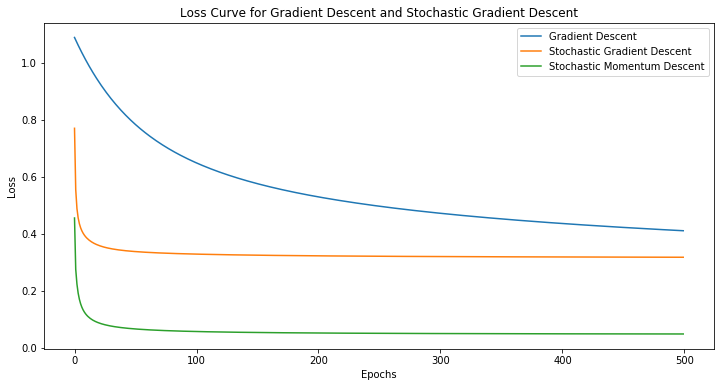

In [31]:
# Plot the loss curves
plt.figure(figsize=(12, 6))
plt.plot(gd_loss_history, label='Gradient Descent')
plt.plot(sgd_loss_history, label='Stochastic Gradient Descent')
plt.plot(sgd_momentum_loss_history, label='Stochastic Momentum Descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for Gradient Descent and Stochastic Gradient Descent')
plt.legend()
plt.show()

In [32]:
def adagrad(X, y, weights, bias, learning_rate, epochs, epsilon=1e-8):
    G_weights = np.zeros_like(weights)
    G_bias = np.zeros_like(bias)
    loss_history = []
    
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(X.shape[0]):
            # Compute the prediction
            z = np.dot(X[i], weights) + bias
            prediction = softmax(z.reshape(1, -1)).flatten()

            # Compute the error
            error = prediction - y[i]

            # Compute the gradient
            gradient_weights = np.outer(X[i], error)
            gradient_bias = error

            # Accumulate the squared gradients
            G_weights += gradient_weights ** 2
            G_bias += gradient_bias ** 2

            # Update the weights and bias
            adjusted_lr_weights = learning_rate / (np.sqrt(G_weights) + epsilon)
            adjusted_lr_bias = learning_rate / (np.sqrt(G_bias) + epsilon)
            weights -= adjusted_lr_weights * gradient_weights
            bias -= adjusted_lr_bias * gradient_bias

            # Compute the loss for this example
            example_loss = compute_loss(X, y, weights, bias)
            epoch_loss += example_loss

        # Store the average loss for the epoch
        loss_history.append(epoch_loss / X.shape[0])
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {epoch_loss / X.shape[0]}')

    return weights, bias, loss_history


In [33]:
adagrad_weights, adagrad_bias, adagrad_loss_history = adagrad(X_train, y_train, weights.copy(), bias.copy(), learning_rate, epochs)


Epoch 0, Loss: 0.8957543680160338
Epoch 10, Loss: 0.5420879473058651
Epoch 20, Loss: 0.47746393492818184
Epoch 30, Loss: 0.44346374270700234
Epoch 40, Loss: 0.42101434292736173
Epoch 50, Loss: 0.40449212818661895
Epoch 60, Loss: 0.3915242743273837
Epoch 70, Loss: 0.38090161490309826
Epoch 80, Loss: 0.3719304044571523
Epoch 90, Loss: 0.36417862238361426
Epoch 100, Loss: 0.35736051570105937
Epoch 110, Loss: 0.35127810719206454
Epoch 120, Loss: 0.34578907997743963
Epoch 130, Loss: 0.3407880020879478
Epoch 140, Loss: 0.3361947822924719
Epoch 150, Loss: 0.33194727167675064
Epoch 160, Loss: 0.32799635457118853
Epoch 170, Loss: 0.32430259351536905
Epoch 180, Loss: 0.3208338771093054
Epoch 190, Loss: 0.31756373390298187
Epoch 200, Loss: 0.3144700998382921
Epoch 210, Loss: 0.31153440144541056
Epoch 220, Loss: 0.3087408632204928
Epoch 230, Loss: 0.306075976992033
Epoch 240, Loss: 0.3035280902056771
Epoch 250, Loss: 0.3010870827710944
Epoch 260, Loss: 0.29874411073146967
Epoch 270, Loss: 0.296491

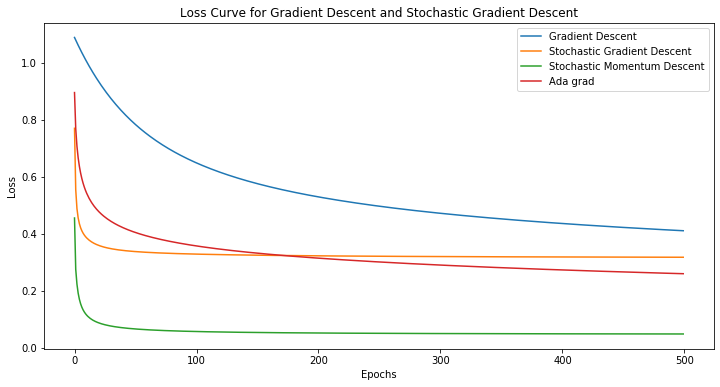

In [34]:
# Plot the loss curves
plt.figure(figsize=(12, 6))
plt.plot(gd_loss_history, label='Gradient Descent')
plt.plot(sgd_loss_history, label='Stochastic Gradient Descent')
plt.plot(sgd_momentum_loss_history, label='Stochastic Momentum Descent')
plt.plot(adagrad_loss_history, label='Ada grad')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for Gradient Descent and Stochastic Gradient Descent')
plt.legend()
plt.show()

In [38]:
def rmsprop(X, y, weights, bias, learning_rate, epochs, beta=0.9, epsilon=1e-8):
    E_weights = np.zeros_like(weights)
    E_bias = np.zeros_like(bias)
    loss_history = []
    
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(X.shape[0]):
            # Compute the prediction
            z = np.dot(X[i], weights) + bias
            prediction = softmax(z.reshape(1, -1)).flatten()

            # Compute the error
            error = prediction - y[i]

            # Compute the gradient
            gradient_weights = np.outer(X[i], error)
            gradient_bias = error

            # Accumulate the squared gradients (exponentially weighted)
            E_weights = beta * E_weights + (1 - beta) * gradient_weights ** 2
            E_bias = beta * E_bias + (1 - beta) * gradient_bias ** 2

            # Update the weights and bias
            adjusted_lr_weights = learning_rate / (np.sqrt(E_weights) + epsilon)
            adjusted_lr_bias = learning_rate / (np.sqrt(E_bias) + epsilon)
            weights -= adjusted_lr_weights * gradient_weights
            bias -= adjusted_lr_bias * gradient_bias

            # Compute the loss for this example
            example_loss = compute_loss(X, y, weights, bias)
            epoch_loss += example_loss

        # Store the average loss for the epoch
        loss_history.append(epoch_loss / X.shape[0])
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {epoch_loss / X.shape[0]}')

    return weights, bias, loss_history


In [39]:
rmsprop_weights, rmsprop_bias, rmsprop_loss_history = rmsprop(X_train, y_train, weights.copy(), bias.copy(), learning_rate, epochs)


Epoch 0, Loss: 0.5785122352751555
Epoch 10, Loss: 0.14625064098331622
Epoch 20, Loss: 0.0972855923258413
Epoch 30, Loss: 0.08129705163156349
Epoch 40, Loss: 0.07428183936595176
Epoch 50, Loss: 0.07069169843042139
Epoch 60, Loss: 0.06871218451640312
Epoch 70, Loss: 0.06758832997626843
Epoch 80, Loss: 0.06695598747715677
Epoch 90, Loss: 0.06662193990787167
Epoch 100, Loss: 0.06647643423003248
Epoch 110, Loss: 0.06645371572570279
Epoch 120, Loss: 0.0665126490518762
Epoch 130, Loss: 0.06662658548043064
Epoch 140, Loss: 0.0667777770946061
Epoch 150, Loss: 0.06695414917807303
Epoch 160, Loss: 0.0671473552605176
Epoch 170, Loss: 0.06735156097912763
Epoch 180, Loss: 0.0675626588524201
Epoch 190, Loss: 0.06777774709789029
Epoch 200, Loss: 0.067994775488172
Epoch 210, Loss: 0.06821229992592077
Epoch 220, Loss: 0.0684293095946325
Epoch 230, Loss: 0.06864510366106559
Epoch 240, Loss: 0.06885920248765891
Epoch 250, Loss: 0.06907128329712349
Epoch 260, Loss: 0.06928113341698722
Epoch 270, Loss: 0.06

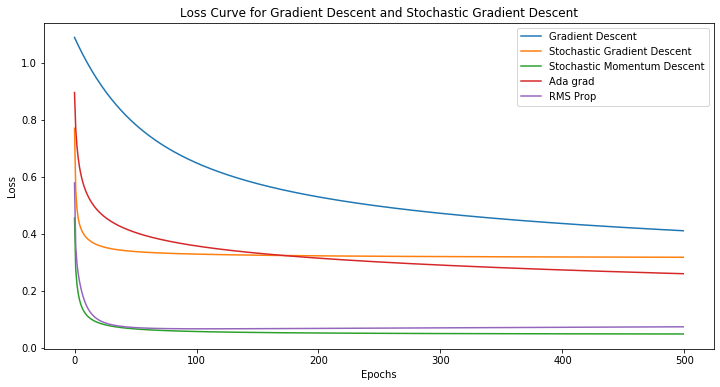

In [40]:
# Plot the loss curves
plt.figure(figsize=(12, 6))
plt.plot(gd_loss_history, label='Gradient Descent')
plt.plot(sgd_loss_history, label='Stochastic Gradient Descent')
plt.plot(sgd_momentum_loss_history, label='Stochastic Momentum Descent')
plt.plot(adagrad_loss_history, label='Ada grad')
plt.plot(rmsprop_loss_history, label='RMS Prop')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for Gradient Descent and Stochastic Gradient Descent')
plt.legend()
plt.show()

In [45]:
def adadelta(X, y, weights, bias, learning_rate, epochs, beta=0.9, epsilon=1e-8):
    E_weights = np.zeros_like(weights)
    E_bias = np.zeros_like(bias)
    E_delta_weights = np.zeros_like(weights)
    E_delta_bias = np.zeros_like(bias)
    loss_history = []
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(X.shape[0]):
            z = np.dot(X[i], weights) + bias
            prediction = softmax(z.reshape(1, -1)).flatten()
            error = prediction - y[i]
            gradient_weights = np.outer(X[i], error)
            gradient_bias = error
            E_weights = beta * E_weights + (1 - beta) * gradient_weights ** 2
            E_bias = beta * E_bias + (1 - beta) * gradient_bias ** 2
            delta_weights = - (np.sqrt(E_delta_weights + epsilon) / np.sqrt(E_weights + epsilon)) * gradient_weights
            delta_bias = - (np.sqrt(E_delta_bias + epsilon) / np.sqrt(E_bias + epsilon)) * gradient_bias
            weights += delta_weights
            bias += delta_bias
            E_delta_weights = beta * E_delta_weights + (1 - beta) * delta_weights ** 2
            E_delta_bias = beta * E_delta_bias + (1 - beta) * delta_bias ** 2
            example_loss = compute_loss(X, y, weights, bias)
            epoch_loss += example_loss
        loss_history.append(epoch_loss / X.shape[0])
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {epoch_loss / X.shape[0]}')
    return weights, bias, loss_history

In [46]:
weights_adadelta, bias_adadelta, adadelta_loss_history = adadelta(X_train, y_train, weights.copy(), bias.copy(), learning_rate, epochs)


Epoch 0, Loss: 1.0694188488247902
Epoch 10, Loss: 0.6839668112305262
Epoch 20, Loss: 0.5218256340205255
Epoch 30, Loss: 0.44458587983305387
Epoch 40, Loss: 0.39975167549870017
Epoch 50, Loss: 0.36966504483008983
Epoch 60, Loss: 0.34761544567347713
Epoch 70, Loss: 0.33048187529766987
Epoch 80, Loss: 0.316576941986949
Epoch 90, Loss: 0.3048983913204838
Epoch 100, Loss: 0.29481506923571565
Epoch 110, Loss: 0.28591298352339206
Epoch 120, Loss: 0.2779116933657776
Epoch 130, Loss: 0.2706159520802809
Epoch 140, Loss: 0.26388652005404395
Epoch 150, Loss: 0.25762194727291976
Epoch 160, Loss: 0.25174687080130365
Epoch 170, Loss: 0.24620430355915962
Epoch 180, Loss: 0.2409504364962413
Epoch 190, Loss: 0.23595106314981315
Epoch 200, Loss: 0.2311790750477966
Epoch 210, Loss: 0.22661267827189185
Epoch 220, Loss: 0.22223410461103846
Epoch 230, Loss: 0.21802866759792064
Epoch 240, Loss: 0.21398406273138385
Epoch 250, Loss: 0.21008984303968878
Epoch 260, Loss: 0.20633702220097347
Epoch 270, Loss: 0.202

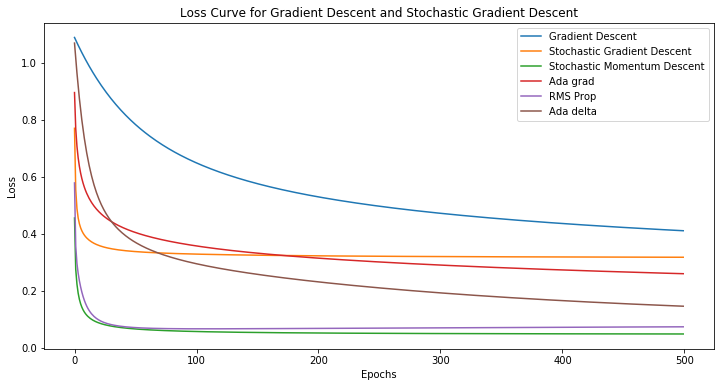

In [47]:
# Plot the loss curves
plt.figure(figsize=(12, 6))
plt.plot(gd_loss_history, label='Gradient Descent')
plt.plot(sgd_loss_history, label='Stochastic Gradient Descent')
plt.plot(sgd_momentum_loss_history, label='Stochastic Momentum Descent')
plt.plot(adagrad_loss_history, label='Ada grad')
plt.plot(rmsprop_loss_history, label='RMS Prop')
plt.plot(adadelta_loss_history, label='Ada delta')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for Gradient Descent and Stochastic Gradient Descent')
plt.legend()
plt.show()

In [48]:
def adam(X, y, weights, bias, learning_rate, epochs, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m_weights = np.zeros_like(weights)
    v_weights = np.zeros_like(weights)
    m_bias = np.zeros_like(bias)
    v_bias = np.zeros_like(bias)
    loss_history = []
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(X.shape[0]):
            z = np.dot(X[i], weights) + bias
            prediction = softmax(z.reshape(1, -1)).flatten()
            error = prediction - y[i]
            gradient_weights = np.outer(X[i], error)
            gradient_bias = error
            m_weights = beta1 * m_weights + (1 - beta1) * gradient_weights
            v_weights = beta2 * v_weights + (1 - beta2) * (gradient_weights ** 2)
            
            m_bias = beta1 * m_bias + (1 - beta1) * gradient_bias
            v_bias = beta2 * v_bias + (1 - beta2) * (gradient_bias ** 2)
            
            m_weights_hat = m_weights / (1 - beta1 ** (epoch + 1))
            v_weights_hat = v_weights / (1 - beta2 ** (epoch + 1))
            
            m_bias_hat = m_bias / (1 - beta1 ** (epoch + 1))
            v_bias_hat = v_bias / (1 - beta2 ** (epoch + 1))
            
            weights -= learning_rate * m_weights_hat / (np.sqrt(v_weights_hat) + epsilon)
            bias -= learning_rate * m_bias_hat / (np.sqrt(v_bias_hat) + epsilon)
            
            example_loss = compute_loss(X, y, weights, bias)
            epoch_loss += example_loss
        loss_history.append(epoch_loss / X.shape[0])
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {epoch_loss / X.shape[0]}')
    return weights, bias, loss_history


In [49]:
_, _, adam_loss = adam(X_train, y_train, weights, bias, learning_rate, epochs)

Epoch 0, Loss: 0.5313096572943157
Epoch 10, Loss: 0.26128459074764876
Epoch 20, Loss: 0.21684144582194007
Epoch 30, Loss: 0.1846481877029632
Epoch 40, Loss: 0.15917495504284365
Epoch 50, Loss: 0.1389217272445502
Epoch 60, Loss: 0.12296339571742641
Epoch 70, Loss: 0.11046759716947661
Epoch 80, Loss: 0.10068189767699724
Epoch 90, Loss: 0.09297285353034815
Epoch 100, Loss: 0.08683870872833487
Epoch 110, Loss: 0.08189748214828665
Epoch 120, Loss: 0.07786461255326035
Epoch 130, Loss: 0.07452992618725815
Epoch 140, Loss: 0.07173815152431268
Epoch 150, Loss: 0.06937389956131379
Epoch 160, Loss: 0.06735062199817454
Epoch 170, Loss: 0.06560267905126883
Epoch 180, Loss: 0.06407969243928949
Epoch 190, Loss: 0.06274252769473386
Epoch 200, Loss: 0.06156042285229319
Epoch 210, Loss: 0.06050892088656825
Epoch 220, Loss: 0.05956836699090464
Epoch 230, Loss: 0.05872280513938604
Epoch 240, Loss: 0.057959159163508724
Epoch 250, Loss: 0.057266618438860876
Epoch 260, Loss: 0.05663617217385965
Epoch 270, Lo

In [ ]:
# Plot the loss curves
plt.figure(figsize=(12, 6))
plt.plot(gd_loss_history, label='Gradient Descent')
plt.plot(sgd_loss_history, label='Stochastic Gradient Descent')
plt.plot(sgd_momentum_loss_history, label='Stochastic Momentum Descent')
plt.plot(adagrad_loss_history, label='Ada grad')
plt.plot(rmsprop_loss_history, label='RMS Prop')
plt.plot(adadelta_loss_history, label='Ada delta')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for Gradient Descent and Stochastic Gradient Descent')
plt.legend()
plt.show()